## Linear Regression

In [1]:
# initializing pandas
import pandas as pd

In [2]:
# loading salary dataset 
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data profiling and inspection

In [3]:
# checking the types of data
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

* data types are float

In [4]:
# descritive statistic
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


* maximum years of experience is 10.5
* minimum years of experience is 1.1
* mean salary is 76003
* maximum salary is 122391 and minimum is 37731

In [5]:
# checking the shape of DataFrame
df.shape

(30, 2)

* dataframe 2dimension with 30 rows and 2 columns

In [6]:
# overall information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


* total number of columns is 2
* total number of rows is 30
* yearsExperience has 30 non-null data
* Salary has 30 non-null data

<Axes: >

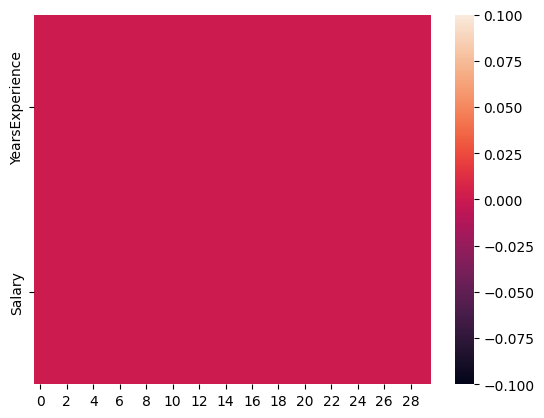

In [7]:
# to check null value
import seaborn as sns
sns.heatmap(df.isnull().transpose())

* no missing data in this data

## Exploratory Data Analysis

<Axes: xlabel='Salary', ylabel='Count'>

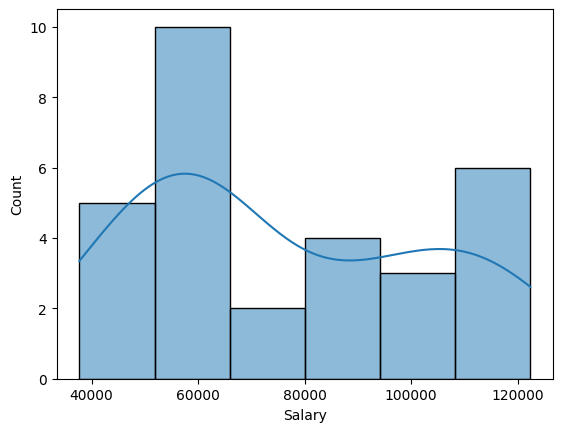

In [8]:
# distribution plot of Sa
sns.histplot(x="Salary",kde=True, data=df)

<Axes: xlabel='YearsExperience', ylabel='Count'>

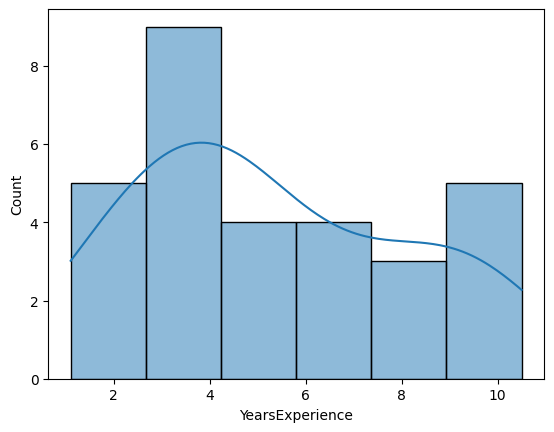

In [9]:
# distribution plot of yearExperience
sns.histplot(x='YearsExperience', kde=True, data=df)

# We want to predict salary

<Axes: >

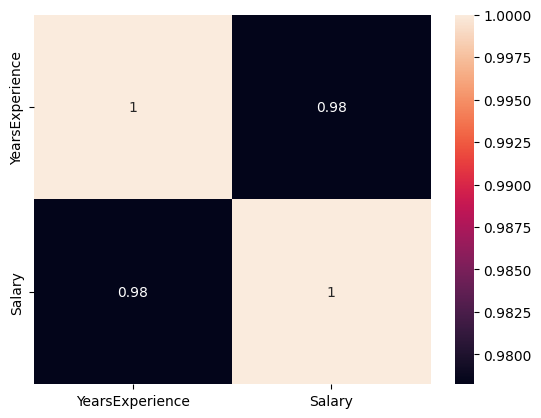

In [10]:
# relation between salary and yearexperience
sns.heatmap(df.corr(numeric_only=True), annot=True)

* Salary and years of experience is positively correlated with correlation value 0.93

## Identify features and label

In [27]:
X = df.loc[:,["YearsExperience"]]
y = df.Salary

## train _test_split

In [15]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [30]:
X_train.shape, y_train.shape

((24, 1), (24,))

## Modeling

In [22]:
# importing regression model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [38]:
# linearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

## Evaluation 

In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"R2 score of LinearRegression is {r2}")

R2 score of LinearRegression is 0.7775083459037235


In [40]:
# Ridge Regression
r_model = Ridge()
r_model.fit(X_train, y_train)
y_pred = r_model.predict(X_test)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"R2 score of RidgeRegression is {r2}")

R2 score of RidgeRegression is 0.7750078818584558


In [41]:
# Lasso Regression
l_model = Lasso()
l_model.fit(X_train, y_train)
y_pred = l_model.predict(X_test)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"R2 score of LassoRegression is {r2}")

R2 score of LassoRegression is 0.7775019001468908


In [42]:
# ElasticNet Regression
e_model = ElasticNet()
e_model.fit(X_train, y_train)
y_pred = e_model.predict(X_test)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"R2 score of ElasticNetRegression is {r2}")

R2 score of ElasticNetRegression is 0.7462488917745826


* LinearRegression and lasso regression has higher r2 score so we use linear or lasso regression in this data

## Serialization

In [43]:
import pickle

In [45]:
with open("model.pickle","bw") as file:
    pickle.dump(lr_model,file)

## Deserialization

In [46]:
with open("model.pickle","br") as file:
    model = pickle.load(file)

In [47]:
model.predict([[4]])

C:\Users\Thinkpad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([64605.78794574])